# Machine Learning analysis of NYC AirBnb Data

### Description:
This notebook covers data exploration, data pipelines and machine learning analysis. The tools used are Pandas for data handling, and scikit-learn and Keras for machine learning

#### Variables and objects in this notebook
- RANDOM_STATE inherits from utils
- df is the parent dataset cleaned for nans
- df_train is a nested dataframe of df used for analysis
- df_test is a nested dataframe of df used only to test distributions
- df_pt is the boxcox transformed continuos/ordinal variables from df_train
- dfx is the working dataframe originated from df_pt
- dfy is a temporary dataframe used for local analysis
- dfy_sam is a random samlped dataframe from dfy


# Code

### Import packages

In [80]:
%load_ext autoreload
%autoreload 2

from utils import *

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We set the random seeds for reproducability

In [81]:
np.random.seed(RANDOM_STATE)

### Import data
import data via CSV file into a pandas dataframe

In [98]:
df = importDataCSV('NYC_AIRBNB_NanClean.csv')

## (1) Data overview 

In [99]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of observations: {}'.format(df.shape[0]))

Number of features: 29
Number of observations: 50376


In [100]:
df.head(2)

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Manhattan,Apartment,Entire home/apt,1,1.000,0.000,1.000,Real Bed,225.000,350.000,95.000,1,0.000,10,1125,10,10,1125,1125,10.000,1125.000,48,9.000,9.000,10.000,10.000,10.000,9.000,0.390
1,Brooklyn,Guest suite,Entire home/apt,3,1.000,1.000,4.000,Real Bed,89.000,500.000,0.000,1,0.000,1,730,1,1,730,730,1.000,730.000,295,9.000,9.000,10.000,9.000,10.000,9.000,4.670


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50376 entries, 0 to 50375
Data columns (total 29 columns):
neighbourhood_group_cleansed    50376 non-null object
property_type                   50376 non-null object
room_type                       50376 non-null object
accommodates                    50376 non-null int64
bathrooms                       50376 non-null float64
bedrooms                        50376 non-null float64
beds                            50376 non-null float64
bed_type                        50376 non-null object
price                           50376 non-null float64
security_deposit                50376 non-null float64
cleaning_fee                    50376 non-null float64
guests_included                 50376 non-null int64
extra_people                    50376 non-null float64
minimum_nights                  50376 non-null int64
maximum_nights                  50376 non-null int64
minimum_minimum_nights          50376 non-null int64
maximum_minimum_nights   

### Map objects to categories

In [102]:
df[df.select_dtypes('object').columns] = df.select_dtypes('object').astype('category')

### Descriptive statistics

In [103]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000,50376.000
mean,2.864,1.150,1.182,1.550,158.225,176.617,53.252,1.523,14.418,7.530,44027.918,7.137,9.107,683479.823,1024515.457,8.534,691238.385,24.875,8.599,8.336,8.696,8.701,8.572,8.418,1.125
std,1.903,0.442,0.762,1.132,348.197,436.510,58.105,1.164,24.443,22.431,9568754.372,21.378,34.406,38266207.003,46862533.380,28.871,38271075.652,47.368,2.053,2.009,2.069,2.073,2.013,1.993,1.618
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,0.000
25%,2.000,1.000,1.000,1.000,69.000,0.000,0.000,1.000,0.000,1.000,29.000,1.000,2.000,29.000,29.000,1.300,29.000,1.000,8.000,7.000,8.000,8.000,8.000,8.000,0.040
50%,2.000,1.000,1.000,1.000,105.000,0.000,40.000,1.000,0.000,3.000,1122.000,2.000,3.000,1125.000,1125.000,3.000,1125.000,6.000,10.000,9.000,10.000,10.000,10.000,9.000,0.380
75%,4.000,1.000,1.000,2.000,175.000,200.000,80.000,2.000,25.000,5.000,1125.000,5.000,5.000,1125.000,1125.000,5.000,1125.000,25.000,10.000,10.000,10.000,10.000,10.000,10.000,1.660
max,25.000,15.500,21.000,40.000,10000.000,5100.000,1000.000,16.000,300.000,1250.000,2147483647.000,1250.000,3456.000,2147483647.000,2147483647.000,1486.200,2147483647.000,675.000,10.000,10.000,10.000,10.000,10.000,10.000,52.630


### Remove if the price is zero

In [104]:
df = df[df['price']!=0]

### Drop some variables that we cannot determine the origin of

In [105]:
drop_no_origin = [
            'minimum_nights', 
            'maximum_nights', 
            'minimum_minimum_nights', 
            'maximum_minimum_nights', 
            'minimum_maximum_nights', 
            'maximum_maximum_nights', 
            'minimum_nights_avg_ntm',
            'maximum_nights_avg_ntm'
            ] 
df = df.drop(drop_no_origin, axis=1)

### Create a training and test set to evaluate models

In [106]:
df_train, df_test = train_test_split(df.sample(frac=1, random_state=RANDOM_STATE), test_size=0.3, random_state=RANDOM_STATE)

## Exploration

### Descriptive statistics

In [107]:
df_train.describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000,35252.000
mean,2.867,1.151,1.181,1.548,160.245,174.285,53.049,1.527,14.404,24.914,8.590,8.328,8.687,8.692,8.566,8.409,1.123
std,1.905,0.446,0.769,1.129,367.015,429.260,57.953,1.174,24.711,47.778,2.058,2.016,2.074,2.078,2.015,1.996,1.629
min,1.000,0.000,0.000,0.000,10.000,0.000,0.000,1.000,0.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,0.000
25%,2.000,1.000,1.000,1.000,69.000,0.000,0.000,1.000,0.000,1.000,8.000,7.000,8.000,8.000,8.000,8.000,0.040
50%,2.000,1.000,1.000,1.000,105.000,0.000,40.000,1.000,0.000,6.000,10.000,9.000,10.000,10.000,10.000,9.000,0.380
75%,4.000,1.000,1.000,2.000,175.000,200.000,80.000,2.000,25.000,25.000,10.000,10.000,10.000,10.000,10.000,10.000,1.650
max,25.000,15.500,21.000,40.000,10000.000,5100.000,1000.000,16.000,300.000,675.000,10.000,10.000,10.000,10.000,10.000,10.000,52.630


In [108]:
df_test.describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000,15108.000
mean,2.857,1.147,1.183,1.556,153.678,181.822,53.712,1.514,14.458,24.783,8.618,8.354,8.718,8.723,8.585,8.438,1.127
std,1.899,0.430,0.745,1.139,299.860,451.387,58.464,1.143,23.816,46.400,2.041,1.994,2.056,2.062,2.008,1.985,1.590
min,1.000,0.000,0.000,0.000,10.000,0.000,0.000,1.000,0.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,0.000
25%,2.000,1.000,1.000,1.000,68.000,0.000,0.000,1.000,0.000,1.000,8.000,7.000,9.000,9.000,8.000,8.000,0.040
50%,2.000,1.000,1.000,1.000,105.000,0.000,40.000,1.000,0.000,6.000,10.000,9.000,10.000,10.000,10.000,9.000,0.390
75%,4.000,1.000,1.000,2.000,175.000,200.000,80.000,2.000,25.000,26.000,10.000,10.000,10.000,10.000,10.000,10.000,1.670
max,22.000,7.000,10.000,22.000,10000.000,5100.000,1000.000,16.000,300.000,494.000,10.000,10.000,10.000,10.000,10.000,10.000,19.950


### Distribution plots

#### Plot the continuous relations

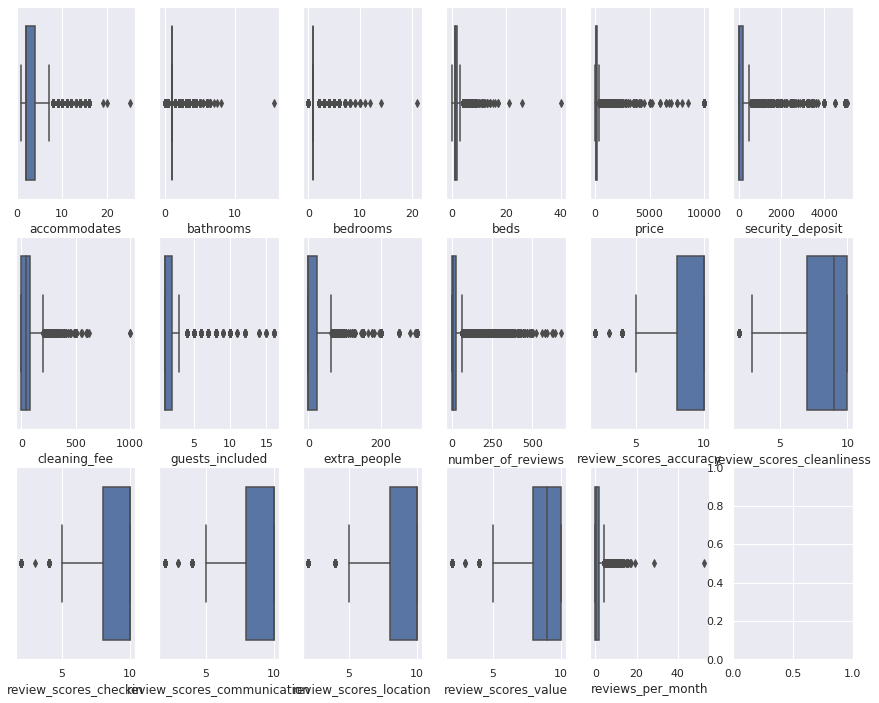

In [109]:
plotBoxPlots(df_train)

#### Power transform the continuous variables

In [110]:
df_pt = df_train.copy()
num_features = df_pt.select_dtypes(include =[np.number]).columns.tolist()
num_features.remove('price')

In [111]:
target = 'price'
df_pt['pt_'+target], fitted_lambda_target = stats.boxcox(np.abs(df_pt[target].values.ravel()+1))

for col in num_features:
    df_pt['pt_'+col], fitted_lambda = stats.boxcox(np.abs(df_pt[col].values.ravel()+1))
df_pt = df_pt.drop(num_features, axis=1)

##### Plot the distributions

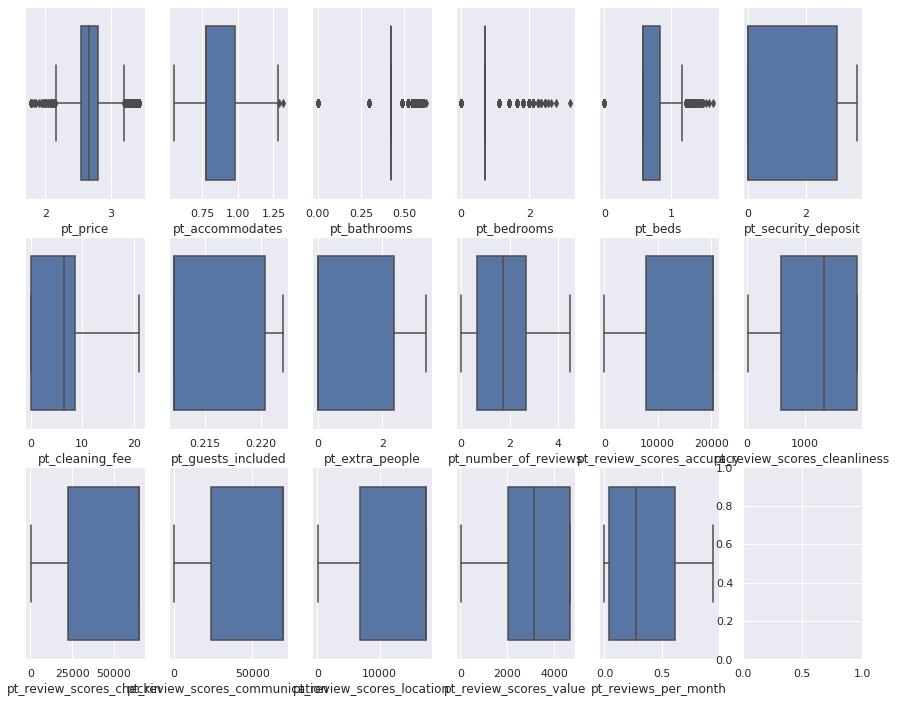

In [112]:
plotBoxPlots(df_pt.drop('price', axis=1))

### Correlations

In [113]:
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35252 entries, 40950 to 42396
Data columns (total 22 columns):
neighbourhood_group_cleansed      35252 non-null category
property_type                     35252 non-null category
room_type                         35252 non-null category
bed_type                          35252 non-null category
price                             35252 non-null float64
pt_price                          35252 non-null float64
pt_accommodates                   35252 non-null float64
pt_bathrooms                      35252 non-null float64
pt_bedrooms                       35252 non-null float64
pt_beds                           35252 non-null float64
pt_security_deposit               35252 non-null float64
pt_cleaning_fee                   35252 non-null float64
pt_guests_included                35252 non-null float64
pt_extra_people                   35252 non-null float64
pt_number_of_reviews              35252 non-null float64
pt_review_scores_accuracy   

##### Plot the continuos/ordinal relations

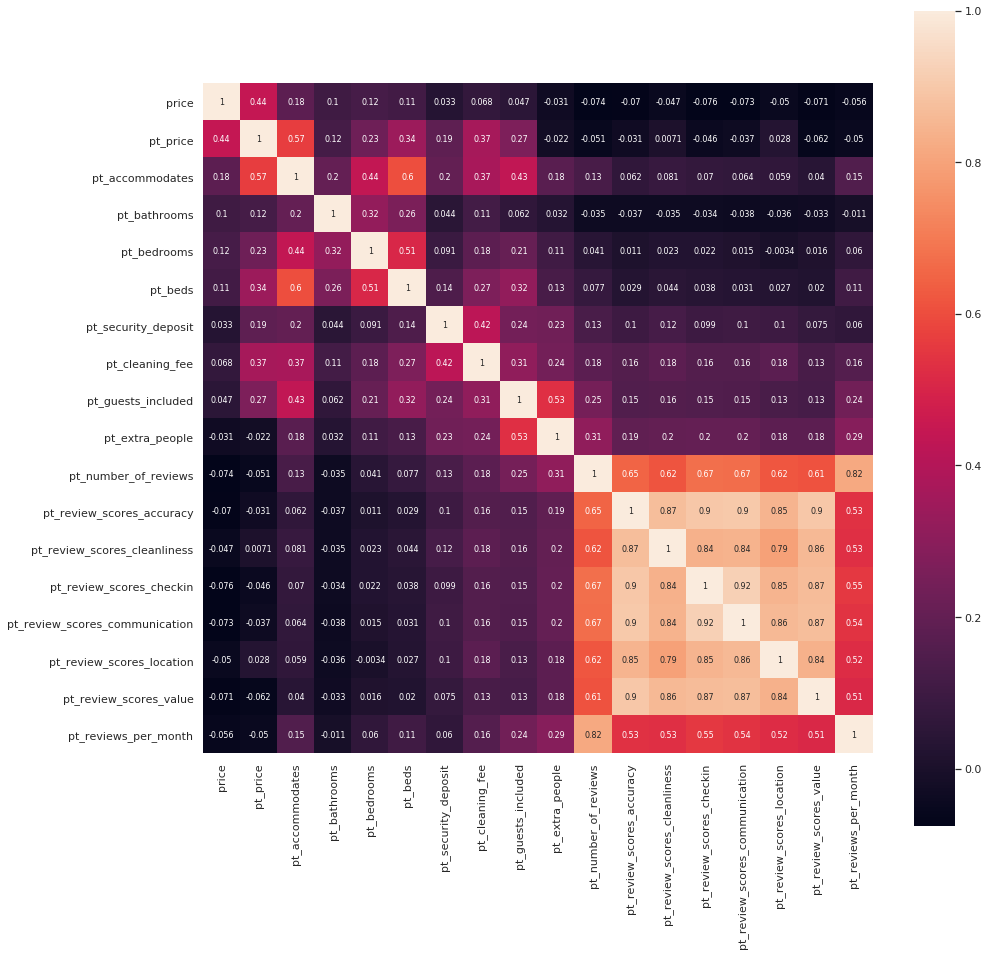

In [114]:
plotRelations(df_pt, loud=False) #Continous vars

#### Plot the discrete relations

It looks like we can drop some variables now, but lets a statistical test continous variables if they are significant from zero

In [131]:
dfy = df_pt.copy()
dfy_sam = dfy.sample(frac=0.1, random_state=RANDOM_STATE) #Lets random sample on 10 % of the data
print('N: {}'.format(len(dfy_sam)))
d_init = {
    'Variable':[],
    'Coefficient': [],
    'Intercept': [],
    'P-value': [],
    'R²': [],
    'Correlation':[]
    }
d = d_init
for x in dfy_sam.select_dtypes(include =[np.number]).drop(['price', 'pt_price'], axis=1).columns.tolist():
    test = linregress(dfy_sam[x], dfy_sam['pt_price'])
    d['Variable'].append('{}'.format(x))
    d['Coefficient'].append('{:.2f}'.format(test[0]))
    d['Intercept'].append('{:.2f}'.format(test[1]))
    d['P-value'].append('{:.2f}'.format(test[3]))
    d['R²'].append('{:.2f}'.format(test[2]**2))
    d['Correlation'].append('{:.2f}'.format(test[2]))
    
del dfy, dfy_sam
pd.DataFrame(d)

N: 3525


,Variable,Coefficient,Intercept,P-value,R²,Correlation
0,pt_accommodates,0.68,2.11,0.00,0.34,0.58
1,pt_bathrooms,0.53,2.44,0.00,0.01,0.12
2,pt_bedrooms,0.14,2.56,0.00,0.06,0.24
3,pt_beds,0.31,2.46,0.00,0.12,0.34
4,pt_security_deposit,0.02,2.64,0.00,0.04,0.20
5,pt_cleaning_fee,0.02,2.57,0.00,0.14,0.37
6,pt_guests_included,13.06,-0.13,0.00,0.07,0.27
7,pt_extra_people,-0.00,2.67,0.96,0.00,-0.00
8,pt_number_of_reviews,-0.01,2.69,0.00,0.00,-0.06
9,pt_review_scores_accuracy,-0.00,2.69,0.00,0.00,-0.06


error: list index out of range

-------------------------------
Excluded column -property_type- as it has more than 20 categories. -property_type- has 35 categories
-------------------------------



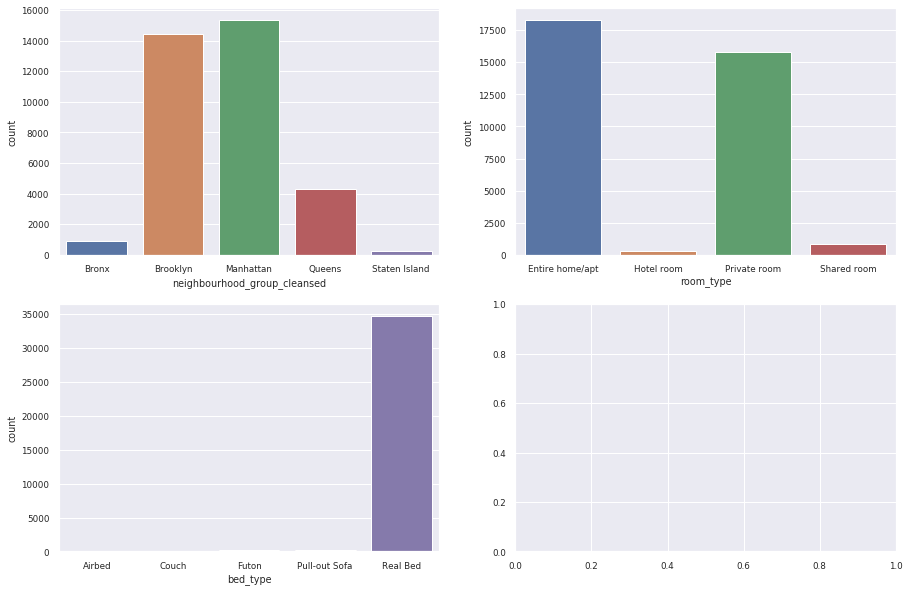

In [115]:
plotDiscreteRelations(df_pt, figsize=[15, 10])

#### Plot average price against neighbourhood

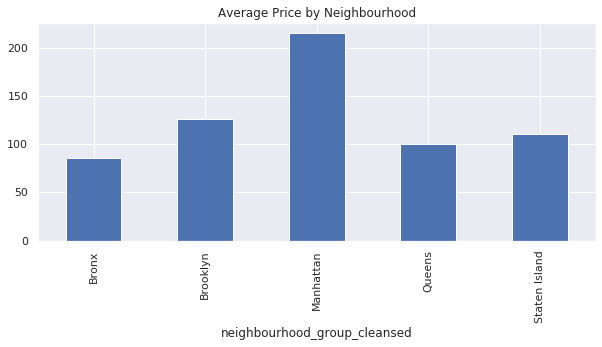

In [116]:
avg_price = df_pt.groupby('neighbourhood_group_cleansed').agg('mean').price
avg_price.plot(kind='bar', figsize=(10,4), title='Average Price by Neighbourhood')

#### plot the price distribution across the categories

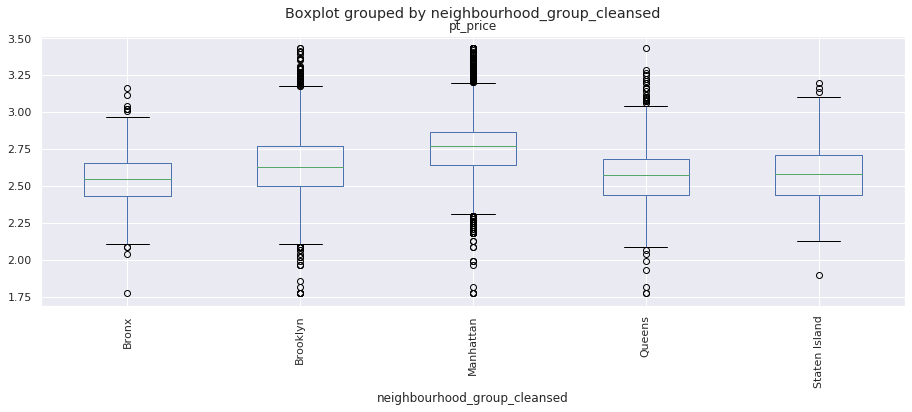

In [117]:
df_pt.boxplot(column='pt_price', by='neighbourhood_group_cleansed', figsize=(15,5), rot=90)

#### Lets look into the correlations

In [118]:
dfy = df_pt.copy()
dfy = pd.get_dummies(dfy, columns=dfy.select_dtypes(include=['category']).columns, drop_first=False)

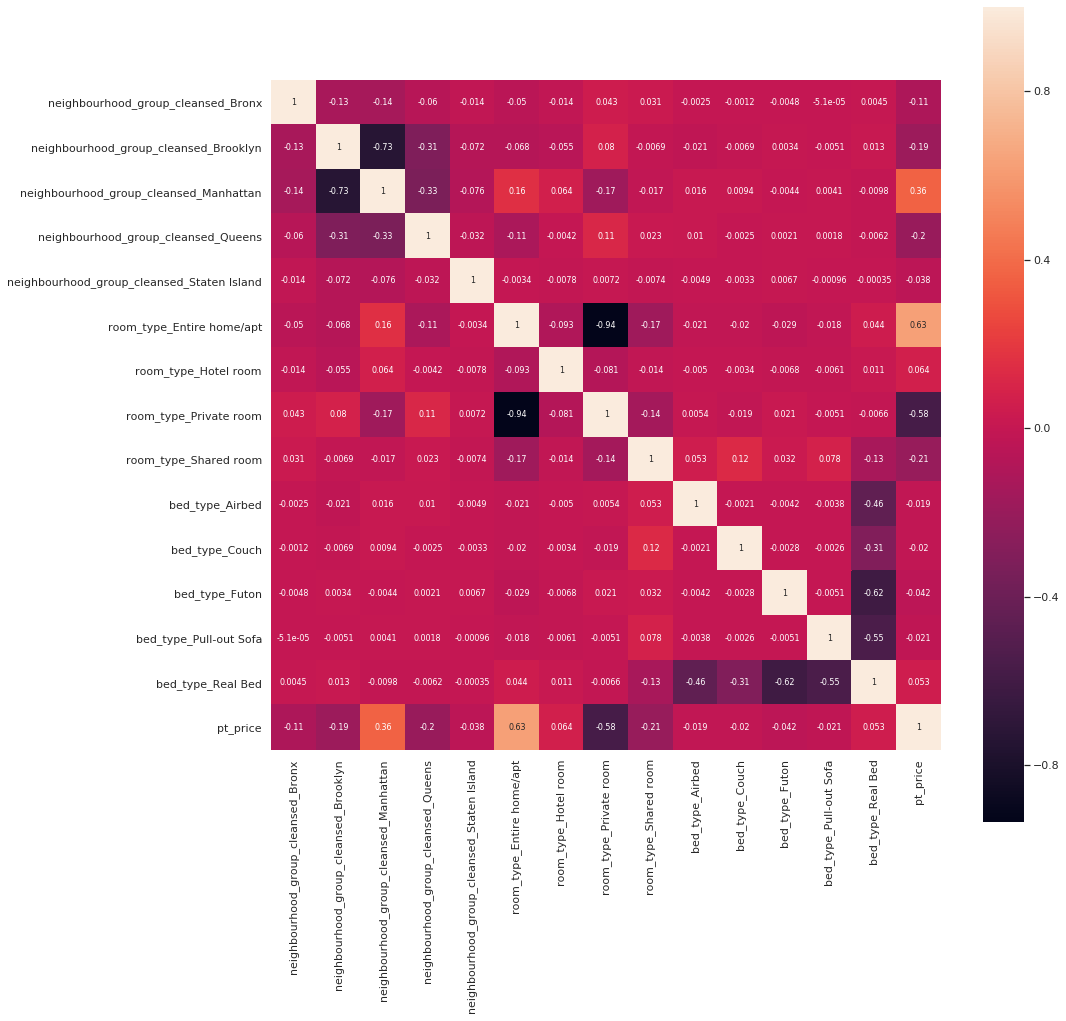

In [119]:
neigh_vars = [i for i in dfy.columns if 'neighbourhood_group_cleansed' in i or 'room_type' in i or 'bed_type' in i]
neigh_vars.append('pt_price') #adding price so we can check correlation
plotRelations(dfy[neigh_vars], loud=False) #discrete vars

### Lets check if we can avoid noisy data - from correlation plot
- there is absolute no correlation for the reviews columns
- There is clear indication of correlation for other columns

##### Initiate the working df

In [26]:
dfx = df_pt.copy()

##### Lets look at the review columns

In [27]:
review_vars = [i for i in dfx.columns if 'review' in i]
review_vars

['pt_number_of_reviews',
 'pt_review_scores_accuracy',
 'pt_review_scores_cleanliness',
 'pt_review_scores_checkin',
 'pt_review_scores_communication',
 'pt_review_scores_location',
 'pt_review_scores_value',
 'pt_reviews_per_month']

In [28]:
dfy = dfx.copy()
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
result = pca.fit_transform(dfy[review_vars].select_dtypes(include=[np.number]))
j = 1
print('Explained variance')
for i in pca.explained_variance_ratio_:
    print('Feature {0}: {1:.2f} %'.format(j, i*100))
    j += 1
print('Sum of explained variance: {:.2f} %'.format(sum(pca.explained_variance_ratio_)*100))
    

Explained variance
Feature 1: 95.13 %
Sum of explained variance: 95.13 %


##### Save to dfy and plot 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


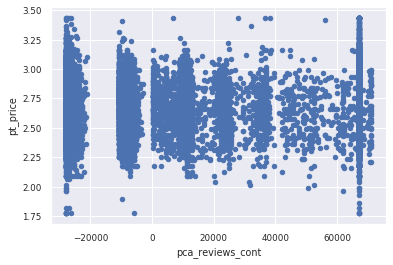

In [29]:
dfy['pca_reviews_cont'] = result
dfy.plot(kind='scatter', x='pca_reviews_cont', y='pt_price')

##### Check statistical significance

In [30]:
dfy_sam = dfy.sample(frac=0.01, random_state=RANDOM_STATE) #Lets random sample on 1 % of the data
d = d_init
for x in ['pca_reviews_cont']:
    test = linregress(dfy_sam[x], dfy_sam['pt_price'])
    d['Variable'].append('{}'.format(x))
    d['Coefficient'].append('{:.2f}'.format(test[0]))
    d['Intercept'].append('{:.2f}'.format(test[1]))
    d['P-value'].append('{:.2f}'.format(test[3]))
    d['R²'].append('{:.2f}'.format(test[2]**2))
    d['Correlation'].append('{:.2f}'.format(test[2]))

--------------
Variable: pca_reviews_cont
Correlation: 0.14
Intercept: 2.69
Coefficient: 0.00
P-value: 0.00993
R²: 0.01879


##### Lets check the other continuous variables

In [31]:
other_corr_vars = [i for i in dfx.columns if not 'review' in i and not 'price' in i and not 'type' in i and not 'group' in i]
other_corr_vars

['pt_accommodates',
 'pt_bathrooms',
 'pt_bedrooms',
 'pt_beds',
 'pt_security_deposit',
 'pt_cleaning_fee',
 'pt_guests_included',
 'pt_extra_people']

In [32]:
pca = PCA(n_components=2)
dfy = dfx.copy()
result = pca.fit_transform(dfy[other_corr_vars])
j = 1
print('Explained variance')
for i in pca.explained_variance_ratio_:
    print('Feature {0}: {1:.2f} %'.format(j, i*100))
    j += 1
print('Sum of explained variance: {:.2f} %'.format(sum(pca.explained_variance_ratio_)*100))
    

Explained variance
Feature 1: 82.38 %
Feature 2: 10.29 %
Sum of explained variance: 92.67 %


##### Save the results to dfy and plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


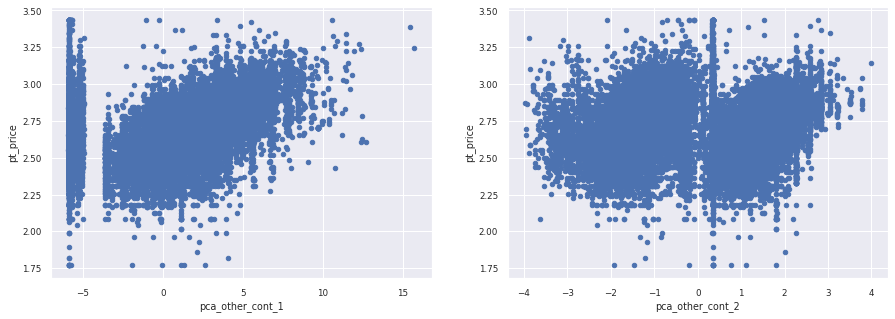

In [33]:
dfy['pca_other_cont_1'], dfy['pca_other_cont_2'] = result[:, 0], result[:, 1]
fig, ax = plt.subplots(1, 2, figsize=(15,5))
dfy.plot(kind='scatter', x='pca_other_cont_1', y='pt_price',  ax=ax[0])
dfy.plot(kind='scatter', x='pca_other_cont_2', y='pt_price', ax=ax[1])

##### Check statistical significance

In [34]:
dfy_sam = dfy.sample(frac=0.1, random_state=RANDOM_STATE) #Lets random sample on 10 % of the data
d = d_init
for x in ['pca_other_cont_1', 'pca_other_cont_2']:
    test = linregress(dfy_sam[x], dfy_sam['pt_price'])
    d['Variable'].append('{}'.format(x))
    d['Coefficient'].append('{:.2f}'.format(test[0]))
    d['Intercept'].append('{:.2f}'.format(test[1]))
    d['P-value'].append('{:.2f}'.format(test[3]))
    d['R²'].append('{:.2f}'.format(test[2]**2))
    d['Correlation'].append('{:.2f}'.format(test[2]))

--------------
Variable: pca_other_cont_1
Correlation: 0.37
Intercept: 2.67
Coefficient: 0.02
P-value: 0.00000
R²: 0.13643
--------------
Variable: pca_other_cont_2
Correlation: 0.01
Intercept: 2.67
Coefficient: 0.00
P-value: 0.45369
R²: 0.00016


##### Lets check the distribution of the significant feature

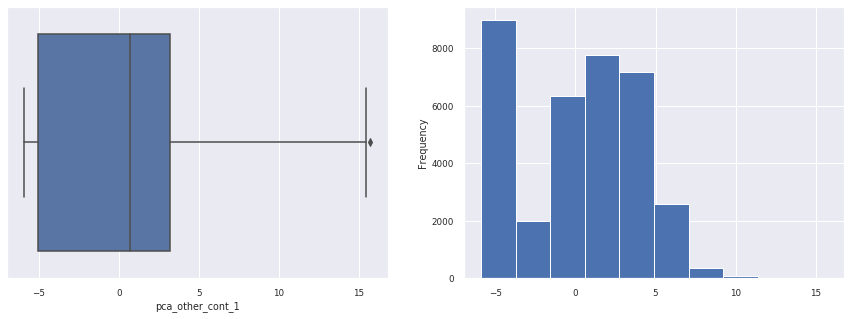

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=dfy, x='pca_other_cont_1', ax=ax[0])
dfy['pca_other_cont_1'].plot(kind='hist', ax=ax[1])

##### Lets save the significant features and drop unused data

In [36]:
_drop_cols = []
_drop_cols.extend(review_vars)
_drop_cols.extend(other_corr_vars)
dfx = pd.concat([dfx,dfy['pca_other_cont_1']], axis=1, verify_integrity=True).drop(_drop_cols, axis=1)

##### Sanity check

In [37]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35252 entries, 40950 to 42396
Data columns (total 7 columns):
neighbourhood_group_cleansed    35252 non-null category
property_type                   35252 non-null category
room_type                       35252 non-null category
bed_type                        35252 non-null category
price                           35252 non-null float64
pt_price                        35252 non-null float64
pca_other_cont_1                35252 non-null float64
dtypes: category(4), float64(3)
memory usage: 1.2 MB


In [38]:
del dfy

#### Lets check the pattern in the categorical variables

In [39]:
dfy = dfx.copy()
dfy = pd.get_dummies(dfy, columns=dfy.select_dtypes(include=['category']).columns, drop_first=False, prefix='dm')

In [40]:
dummy_vars = [i for i in dfy.columns if 'dm' in i]

In [41]:
pca = PCA(n_components=3)
result = pca.fit_transform(dfy[dummy_vars])
j = 1
print('Explained variance')
for i in pca.explained_variance_ratio_:
    print('Feature {0}: {1:.2f} %'.format(j, i*100))
    j += 1
print('Sum of explained variance: {:.2f} %'.format(sum(pca.explained_variance_ratio_)*100))
    

Explained variance
Feature 1: 33.95 %
Feature 2: 25.10 %
Feature 3: 14.51 %
Sum of explained variance: 73.55 %


##### save the results to dfy and plot

In [42]:
dfy['pca_dummy_1'], dfy['pca_dummy_2'], dfy['pca_dummy_3'] = result[:, 0], result[:, 1], result[:, 2]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


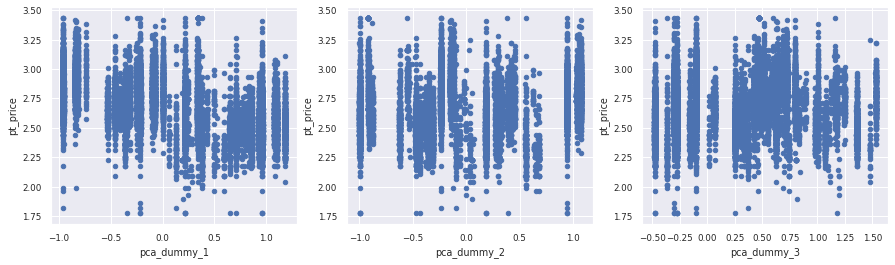

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
dfy.plot(kind='scatter', x='pca_dummy_1', y='pt_price', ax=ax[0])
dfy.plot(kind='scatter', x='pca_dummy_2', y='pt_price', ax=ax[1])
dfy.plot(kind='scatter', x='pca_dummy_3', y='pt_price', ax=ax[2])

##### Check significance and plot

In [44]:
dfy_sam = dfy.sample(frac=0.1, random_state=RANDOM_STATE) #Lets random sample on 1 % of the data
d = d_init
for x in ['pca_dummy_1', 'pca_dummy_2', 'pca_dummy_3']:
    test = linregress(dfy_sam[x], dfy_sam['pt_price'])
    d['Variable'].append('{}'.format(x))
    d['Coefficient'].append('{:.2f}'.format(test[0]))
    d['Intercept'].append('{:.2f}'.format(test[1]))
    d['P-value'].append('{:.2f}'.format(test[3]))
    d['R²'].append('{:.2f}'.format(test[2]**2))
    d['Correlation'].append('{:.2f}'.format(test[2]))

--------------
Variable: pca_dummy_1
Correlation: -0.64
Intercept: 2.67
Coefficient: -0.17
P-value: 0.00000
R²: 0.41265
--------------
Variable: pca_dummy_2
Correlation: 0.13
Intercept: 2.67
Coefficient: 0.04
P-value: 0.00000
R²: 0.01770
--------------
Variable: pca_dummy_3
Correlation: 0.07
Intercept: 2.67
Coefficient: 0.03
P-value: 0.00006
R²: 0.00460


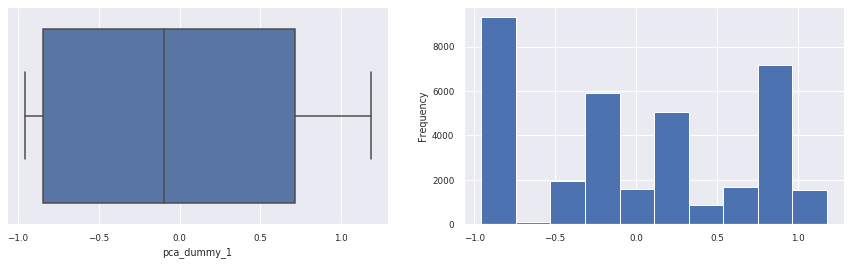

In [45]:
fig, ax = plt.subplots(1,2, figsize=(15, 4))
sns.boxplot(data=dfy, x='pca_dummy_1', ax=ax[0])
dfy['pca_dummy_1'].plot(kind='hist', ax=ax[1])

##### Save the significant features to dfx and drop ununsed data

In [46]:
_drop_cols = []
_drop_cols.extend(dfx.select_dtypes(include=['category']).columns.tolist())
dfx = pd.concat([dfx, dfy[['pca_dummy_1', 'pca_dummy_2', 'pca_dummy_3']]], axis=1, verify_integrity=True).drop(_drop_cols, axis=1)

##### sanity check


In [47]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35252 entries, 40950 to 42396
Data columns (total 6 columns):
price               35252 non-null float64
pt_price            35252 non-null float64
pca_other_cont_1    35252 non-null float64
pca_dummy_1         35252 non-null float64
pca_dummy_2         35252 non-null float64
pca_dummy_3         35252 non-null float64
dtypes: float64(6)
memory usage: 1.9 MB


In [48]:
del dfy

### Lets do some proper statistics on our findings

In [49]:
from scipy.special import inv_boxcox
def ptInvert(df, fitted_lambda):
    return inv_boxcox(df['y_pred_pt'], fitted_lambda)

#### OLS

In [50]:
dfy = dfx.copy().sample(frac=0.01, random_state=RANDOM_STATE)
dfy['pca_continuous_1'] = dfy['pca_other_cont_1']
dfy['intercept'] = 1
dfy = dfy.drop('pca_other_cont_1', axis=1)

lr_cols = [i for i in dfy.columns if 'pca_continuous' in i or'pca_dummy' in i or 'intercept' in i]
X, y = dfy[lr_cols], dfy['pt_price']
results = sm.OLS(y,X).fit()
print(results.summary())

dfy['y_pred_pt'] = results.predict(X)
dfy['error_pt'] = dfy['pt_price'] - dfy['y_pred_pt']
dfy['y_pred'] = ptInvert(dfy, fitted_lambda_target)
dfy['error'] = dfy['price'] - dfy['y_pred']

                            OLS Regression Results                            
Dep. Variable:               pt_price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     73.56
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.00e-45
Time:                        11:30:31   Log-Likelihood:                 192.06
No. Observations:                 353   AIC:                            -374.1
Df Residuals:                     348   BIC:                            -354.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
pca_dummy_1         -0.1605      0.011  

##### Zero conditional mean

In [51]:
dfy[['error_pt', 'y_pred_pt']].cov()

,error_pt,y_pred_pt
error_pt,0.020,-0.000
y_pred_pt,-0.000,0.017


In [52]:
dfy[['error', 'y_pred']].cov()

,error,y_pred
error,22039.225,734.019
y_pred,734.019,3053.556


##### Error plot

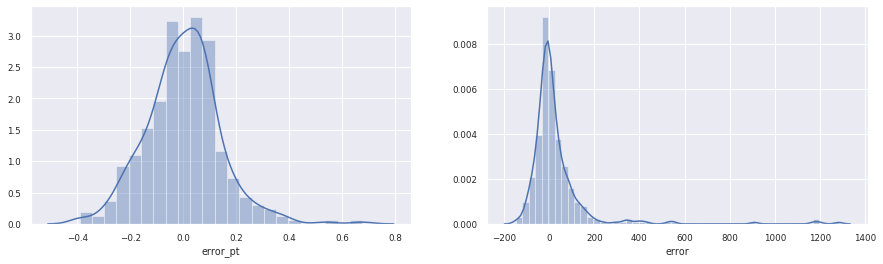

In [53]:
ffig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.distplot(dfy['error_pt'], ax=ax[0])
sns.distplot(dfy['error'], ax=ax[1])
print('Normality (log) - Value: {0:.2f} - p: {1:.2f}'.format(jarque_bera(dfy['error_pt'])[0], jarque_bera(dfy['error_pt'])[1])) #The null is equal distribution to normal distribution
print('Error mean and stdev (log): {0:.2f} ; {1:.2f}'.format(dfy['error_pt'].mean(), dfy['error_pt'].std()))
print('Normality (level) - Value: {0:.2f} - p: {1:.2f}'.format(jarque_bera(dfy['error'])[0], jarque_bera(dfy['error'])[1])) #The null is equal distribution to normal distribution
print('Error mean and stdev (level): {0:.2f} ; {1:.2f}'.format(dfy['error'].mean(), dfy['error'].std()))

##### Homoscedasticity

Lagrange multiplier statistic: 15.80
p-value: 0.00
f-value: 4.08
f p-value: 0.00


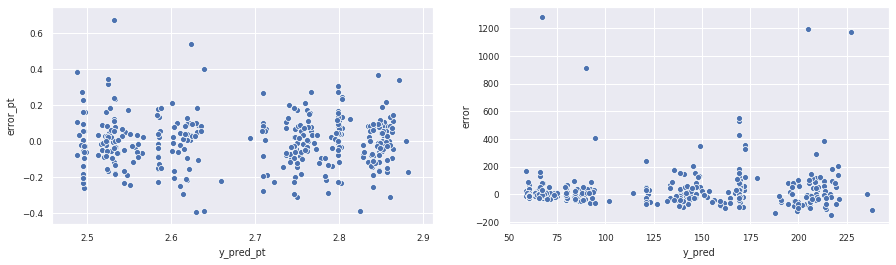

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.scatterplot(data=dfy, y='error_pt', x='y_pred_pt', ax=ax[0])
sns.scatterplot(data=dfy, y='error', x='y_pred', ax=ax[1])
test = sms.het_breuschpagan(dfy['error_pt'], results.model.exog) #The null is homoscecdasticity
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
for i, j in zip(name, test):
    print('{0}: {1:.2f}'.format(i, j))
# lzip(name, test)

In [55]:
del dfy

#### Penalized OLS

In [56]:
dfy = dfx.copy().sample(frac=0.01, random_state=RANDOM_STATE)
dfy['intercept'] = 1
lr_cols = [i for i in dfy.columns if 'pca_other_cont' in i or'pca_dummy' in i or 'intercept' in i]
X, y = dfy[lr_cols], dfy['pt_price']
results = sm.OLS(y,X).fit_regularized(alpha=0.1, L1_wt=1.0)
# print(results.summary())
dfy['y_pred_pt'] = results.predict(X)
dfy['error_pt'] = dfy['pt_price'] - dfy['y_pred_pt']
dfy['y_pred'] = ptInvert(dfy, fitted_lambda_target)
dfy['error'] = dfy['price'] - dfy['y_pred']

##### Zero conditional mean

In [57]:
dfy[['error_pt', 'y_pred_pt']].cov()

,error_pt,y_pred_pt
error_pt,0.033,0.001
y_pred_pt,0.001,0.001


In [58]:
dfy[['error', 'y_pred']].cov()

,error,y_pred
error,26011.699,235.400
y_pred,235.400,78.322


##### Error plot

Normality (log) - Value: 1.72 - p: 0.42
Error mean and stdev (log): 0.10 ; 0.18
Normality (level) - Value: 13284.61 - p: 0.00
Error mean and stdev (level): 76.91 ; 161.28


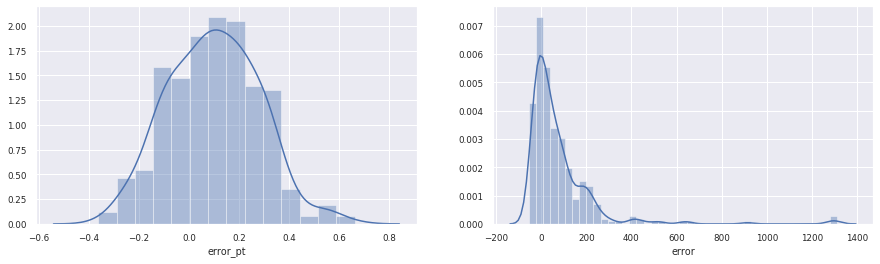

In [59]:
ffig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.distplot(dfy['error_pt'], ax=ax[0])
sns.distplot(dfy['error'], ax=ax[1])
print('Normality (log) - Value: {0:.2f} - p: {1:.2f}'.format(jarque_bera(dfy['error_pt'])[0], jarque_bera(dfy['error_pt'])[1])) #The null is equal distribution to normal distribution
print('Error mean and stdev (log): {0:.2f} ; {1:.2f}'.format(dfy['error_pt'].mean(), dfy['error_pt'].std()))
print('Normality (level) - Value: {0:.2f} - p: {1:.2f}'.format(jarque_bera(dfy['error'])[0], jarque_bera(dfy['error'])[1])) #The null is equal distribution to normal distribution
print('Error mean and stdev (level): {0:.2f} ; {1:.2f}'.format(dfy['error'].mean(), dfy['error'].std()))

##### Homoscedasticity

Lagrange multiplier statistic: 7.90
p-value: 0.10
f-value: 1.99
f p-value: 0.10


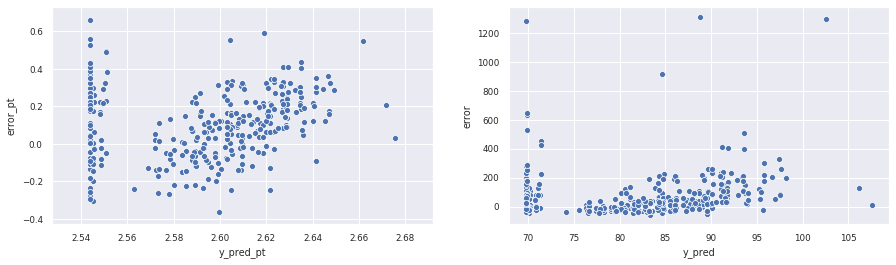

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.scatterplot(data=dfy, y='error_pt', x='y_pred_pt', ax=ax[0])
sns.scatterplot(data=dfy, y='error', x='y_pred', ax=ax[1])
test = sms.het_breuschpagan(dfy['error'], results.model.exog) #The null is homoscecdasticity
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
for i, j in zip(name, test):
    print('{0}: {1:.2f}'.format(i, j))
# lzip(name, test)

In [61]:
del dfy

#### Robust

In [141]:
import statsmodels.api as sm
dfy = dfx.copy().sample(frac=0.01, random_state=RANDOM_STATE)

dfy['intercept'] = 1
lr_cols = [i for i in dfy.columns if 'pca_other_cont' in i or'pca_dummy' in i or 'intercept' in i]
X, y = dfy[lr_cols], dfy['pt_price']
results = sm.RLM(y,X, M=sm.robust.norms.HuberT()).fit()
print(results.summary())
dfy['y_pred_pt'] = results.predict(X)
dfy['error_pt'] = dfy['pt_price'] - dfy['y_pred_pt']
dfy['y_pred'] = ptInvert(dfy, fitted_lambda_target)
dfy['error'] = dfy['price'] - dfy['y_pred']
print('--------------------')
print('R²: {:.3f}'.format(r2_score(dfy['pt_price'], dfy['y_pred_pt'])))

                    Robust linear Model Regression Results                    
Dep. Variable:               pt_price   No. Observations:                  353
Model:                            RLM   Df Residuals:                      349
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 05 Feb 2020                                         
Time:                        12:44:23                                         
No. Iterations:                    16                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
pca_other_cont_1     0.0054      0.002  

##### Zero conditional mean

In [63]:
dfy[['error_pt', 'y_pred_pt']].cov()

,error_pt,y_pred_pt
error_pt,0.020,-0.001
y_pred_pt,-0.001,0.018


In [64]:
dfy[['error', 'y_pred']].cov()

,error,y_pred
error,22079.039,656.354
y_pred,656.354,3169.074


##### Error plot

Normality (log) - Value: 70.87 - p: 0.00
Error mean and stdev (log): 0.00 ; 0.14
Normality (level) - Value: 22216.74 - p: 0.00
Error mean and stdev (level): 30.08 ; 148.59


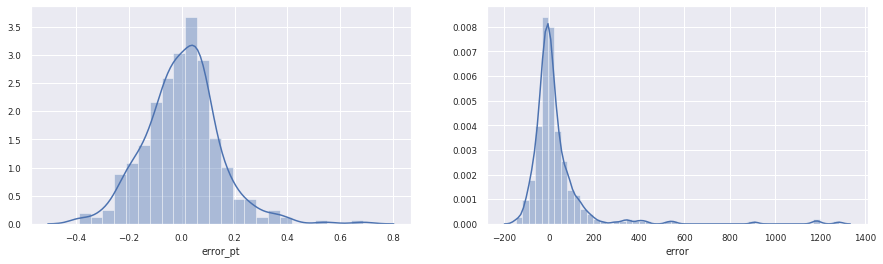

In [65]:
ffig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.distplot(dfy['error_pt'], ax=ax[0])
sns.distplot(dfy['error'], ax=ax[1])
print('Normality (log) - Value: {0:.2f} - p: {1:.2f}'.format(jarque_bera(dfy['error_pt'])[0], jarque_bera(dfy['error_pt'])[1])) #The null is equal distribution to normal distribution
print('Error mean and stdev (log): {0:.2f} ; {1:.2f}'.format(dfy['error_pt'].mean(), dfy['error_pt'].std()))
print('Normality (level) - Value: {0:.2f} - p: {1:.2f}'.format(jarque_bera(dfy['error'])[0], jarque_bera(dfy['error'])[1])) #The null is equal distribution to normal distribution
print('Error mean and stdev (level): {0:.2f} ; {1:.2f}'.format(dfy['error'].mean(), dfy['error'].std()))

##### Homoscedasticity

Lagrange multiplier statistic: 4.69
p-value: 0.32
f-value: 1.17
f p-value: 0.32


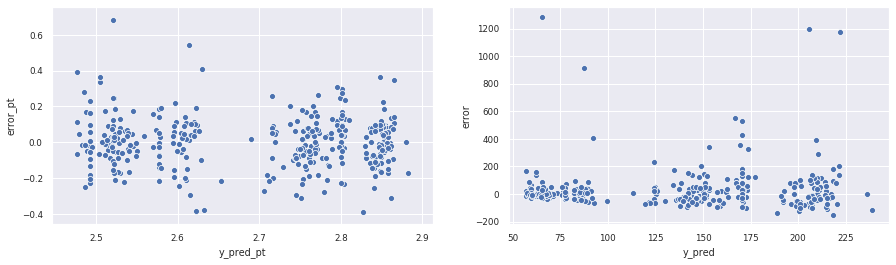

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.scatterplot(data=dfy, y='error_pt', x='y_pred_pt', ax=ax[0])
sns.scatterplot(data=dfy, y='error', x='y_pred', ax=ax[1])
test = sms.het_breuschpagan(dfy['error'], results.model.exog) #The null is homoscecdasticity
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
for i, j in zip(name, test):
    print('{0}: {1:.2f}'.format(i, j))


In [67]:
del dfy

### Outliers

In [68]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35252 entries, 40950 to 42396
Data columns (total 6 columns):
price               35252 non-null float64
pt_price            35252 non-null float64
pca_other_cont_1    35252 non-null float64
pca_dummy_1         35252 non-null float64
pca_dummy_2         35252 non-null float64
pca_dummy_3         35252 non-null float64
dtypes: float64(6)
memory usage: 1.9 MB


#### Lets drop insignificant vars

In [69]:
dfx = dfx.drop(['pca_dummy_3'], axis=1)

#### Lets try to see if we can find something in the continous variables that would indicate a price outlier

In [70]:
dfy = dfx.copy()
dfy['ContOutlier'], _, _ = detectOutliers(dfy, ['pca_other_cont_1'], df_test=None, outliers_fraction=0.001)

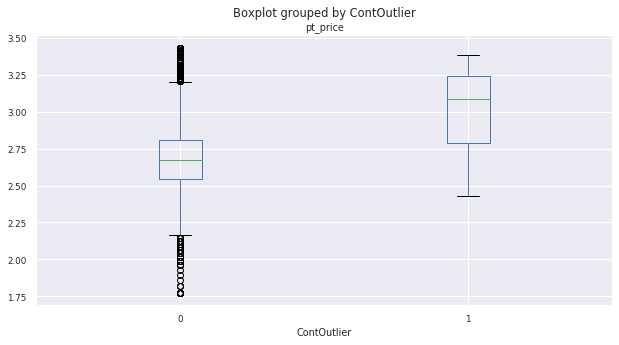

In [71]:
dfy.boxplot(column='pt_price', by='ContOutlier', figsize=(10,5))

##### Lets take some continuous/ordinal variables into consideration

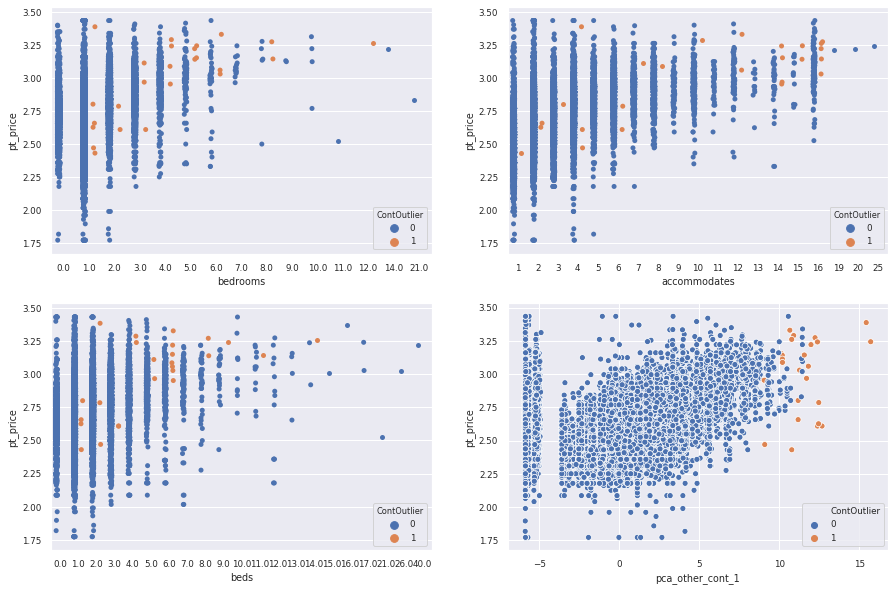

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
dfy['bedrooms'] = df_train['bedrooms']
dfy['accommodates'] = df_train['accommodates']
dfy['beds'] = df_train['beds']
sns.stripplot(data=dfy, x='bedrooms', y='pt_price', hue='ContOutlier', dodge=True, ax=ax[0, 0])
sns.stripplot(data=dfy, x='accommodates', y='pt_price', hue='ContOutlier', dodge=True, ax=ax[0,1])
sns.stripplot(data=dfy, x='beds', y='pt_price', hue='ContOutlier', dodge=True, ax=ax[1, 0])
sns.scatterplot(data=dfy, x='pca_other_cont_1', y='pt_price', hue='ContOutlier', ax=ax[1, 1])

In [73]:
dfy_sam = dfy.sample(frac=0.1, random_state=RANDOM_STATE) #Lets random sample on 10 % of the data
d = d_init
print('N: {}'.format(len(dfy_sam)))
for x in ['ContOutlier']:
    test = linregress(dfy_sam[x], dfy_sam['pt_price'])
    d['Variable'].append('{}'.format(x))
    d['Coefficient'].append('{:.2f}'.format(test[0]))
    d['Intercept'].append('{:.2f}'.format(test[1]))
    d['P-value'].append('{:.2f}'.format(test[3]))
    d['R²'].append('{:.2f}'.format(test[2]**2))
    d['Correlation'].append('{:.2f}'.format(test[2]))

N: 3525
--------------
Variable: ContOutlier
Correlation: 0.06
Intercept: 2.67
Coefficient: 0.49
P-value: 0.00036
R²: 0.00361


#### Lets see if we can find some pattern in the discrete variables that would indicate a price outlier

In [74]:
dfy = dfx.copy()
cat_columns = [i for i in dfy.columns if 'dummy' in i]
cat_columns

['pca_dummy_1', 'pca_dummy_2']

In [75]:
dfy['CatOutlier'], _, _ = detectOutliers(dfy, features=cat_columns, outliers_fraction=0.001, df_test=None)

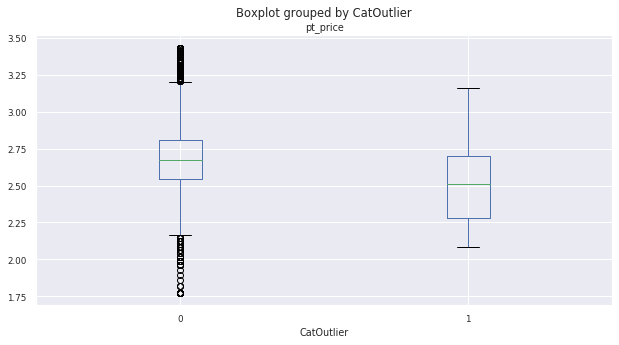

In [76]:
dfy.boxplot(column='pt_price', by='CatOutlier', figsize=(10,5))

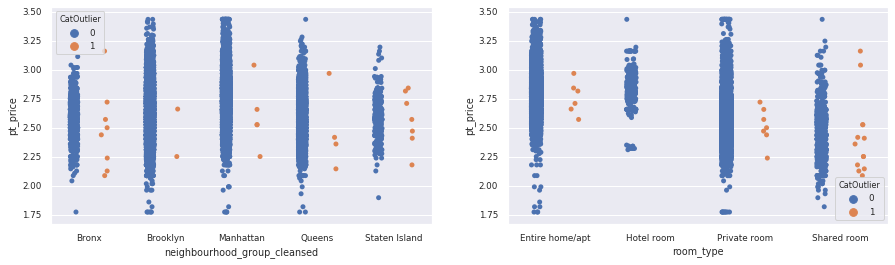

In [77]:
dfy['neighbourhood_group_cleansed'] = df_train['neighbourhood_group_cleansed']
dfy['property_type'] = df_train['property_type']
dfy['room_type'] = df_train['room_type']
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.stripplot(data=dfy, x='neighbourhood_group_cleansed', y='pt_price', hue='CatOutlier', dodge=True, ax=ax[0])
sns.stripplot(data=dfy, x='room_type', y='pt_price', hue='CatOutlier', dodge=True, ax=ax[1])

In [78]:
# fig, ax = plt.subplots(1, figsize=(15,4))
# sns.stripplot(data=dfy, x='property_type', y='pt_price', hue='CatOutlier', dodge=True, ax=ax)

In [79]:
dfy_sam = dfy.sample(frac=0.1, random_state=RANDOM_STATE) #Lets random sample on 10 % of the data
d = d_init
print('N: {}'.format(len(dfy_sam)))
for x in ['CatOutlier']:
    test = linregress(dfy_sam[x], dfy_sam['pt_price'])
    d['Variable'].append('{}'.format(x))
    d['Coefficient'].append('{:.2f}'.format(test[0]))
    d['Intercept'].append('{:.2f}'.format(test[1]))
    d['P-value'].append('{:.2f}'.format(test[3]))
    d['R²'].append('{:.2f}'.format(test[2]**2))
    d['Correlation'].append('{:.2f}'.format(test[2]))

N: 3525
--------------
Variable: CatOutlier
Correlation: 0.03
Intercept: 2.67
Coefficient: 0.27
P-value: 0.05010
R²: 0.00109
